In [30]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.applications import VGG16
import random
from glob import glob
import seaborn as sns
from keras.losses import SparseCategoricalCrossentropy
import matplotlib.image as img
import warnings
warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [31]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
try:
    tf.config.experimental.set_memory_growth = True
except Exception as ex:
    print(e)

[]


In [32]:
data_dir_train = pathlib.Path("C:/Abhinav/Test/DL/skin_cancer/skin_cancer_images/Train")
data_dir_test = pathlib.Path("C:/Abhinav/Test/DL/skin_cancer/skin_cancer_images/Test")

In [33]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


**Preparing the Dataset**

In [34]:
batch_size = 32
img_height = 180
img_width = 180
rnd_seed = 141
random.seed(rnd_seed)

In [35]:
train_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split = 0.2,
    subset = "training",
    seed = 141,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 2946 files belonging to 9 classes.
Using 2357 files for training.


In [36]:
val_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split = 0.2,
    subset = "validation",
    seed = 141,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 2946 files belonging to 9 classes.
Using 589 files for validation.


In [37]:
test_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    validation_split = 0.9,
    subset = "validation",
    seed = 141,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 118 files belonging to 9 classes.
Using 106 files for validation.


In [38]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


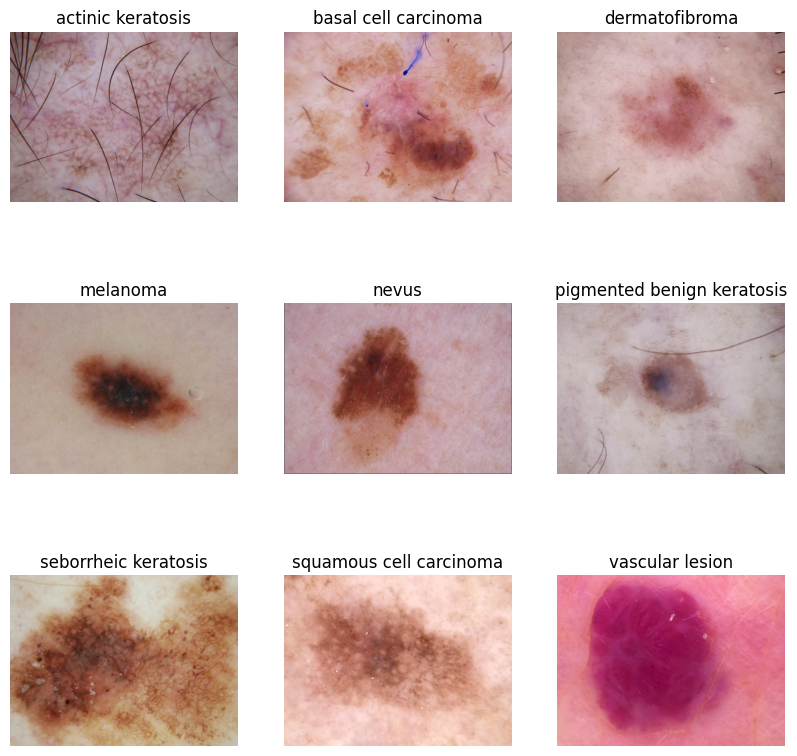

In [39]:
num_classes = len(class_names)
plt.figure(figsize=(10,10))
for i in range(num_classes):
    plt.subplot(3, 3, i+1)
    image = img.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
    plt.title(class_names[i])
    plt.axis("off")
    plt.imshow(image)

In [40]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 180, 180, 3)
(32,)


In [41]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Model 1: Standard Model**

In [42]:
num_classes = 9
model = Sequential([layers.experimental.preprocessing.Rescaling(1.0/255,input_shape=(img_height,img_width,3))])

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(256, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(512, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(units=num_classes, activation="softmax"))

In [43]:
opt = Adam(lr=0.001)
model.compile(optimizer = opt, loss = SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 90, 90, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 45, 45, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 45, 45, 128)      

In [45]:
epochs = 25
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/25
74/74 [==============================] - 70s 802ms/step - loss: 2.0123 - accuracy: 0.2809 - val_loss: 2.0054 - val_accuracy: 0.2598
Epoch 2/25
74/74 [==============================] - 51s 690ms/step - loss: 1.8629 - accuracy: 0.3309 - val_loss: 1.6601 - val_accuracy: 0.4397
Epoch 3/25
74/74 [==============================] - 65s 878ms/step - loss: 1.7177 - accuracy: 0.4056 - val_loss: 1.6139 - val_accuracy: 0.4635
Epoch 4/25
74/74 [==============================] - 56s 763ms/step - loss: 1.5448 - accuracy: 0.4569 - val_loss: 1.5743 - val_accuracy: 0.4550
Epoch 5/25
74/74 [==============================] - 53s 715ms/step - loss: 1.4797 - accuracy: 0.4913 - val_loss: 1.4392 - val_accuracy: 0.5212
Epoch 6/25
74/74 [==============================] - 55s 744ms/step - loss: 1.3761 - accuracy: 0.5278 - val_loss: 1.4399 - val_accuracy: 0.5229
Epoch 7/25
74/74 [==============================] - 51s 691ms/step - loss: 1.2767 - accuracy: 0.5630 - val_loss: 1.3710 - val_accuracy: 0.5297

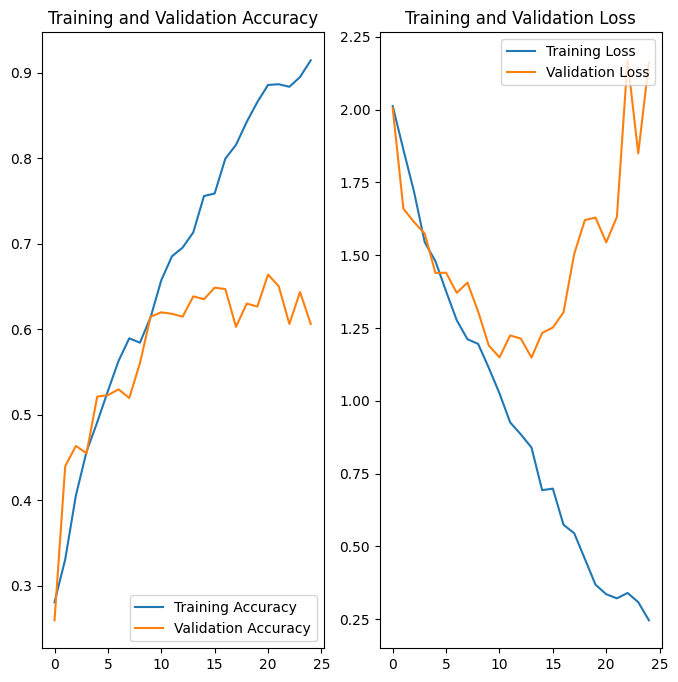

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Findings :
- The model is overfitting because we can see the difference in accuracy in training data & accuracy in the validation data that is almost 20%.

- The training accuracy is just around 70-75% with 25 epochos and the model is yet to learn the many features.

- data imbalance might be causing the bais to the model.

**Model 2 : Data Augumentation with drop out layer.**

In [48]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

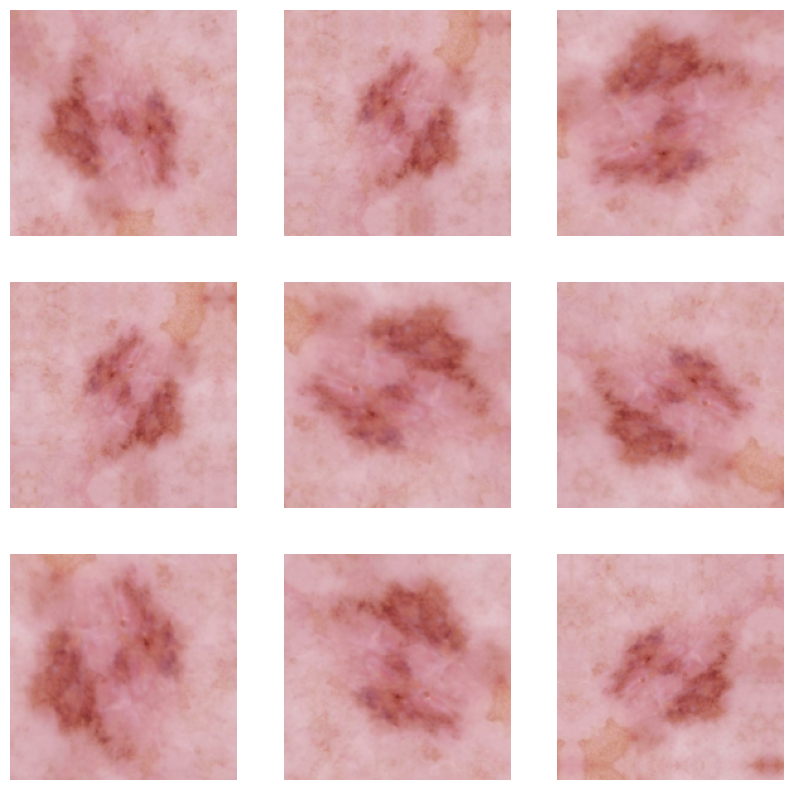

In [49]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [50]:
num_classes = 9
model = Sequential(data_augmentation)
model.add(layers.experimental.preprocessing.Rescaling(1.0/255,input_shape=(img_height,img_width,3)))

model.add(Conv2D(32, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.15))

model.add(Conv2D(256, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.20))

model.add(Conv2D(512, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(units=num_classes, activation= 'softmax'))

In [51]:
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss= SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [52]:
epochs = 25
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/25
74/74 [==============================] - 76s 933ms/step - loss: 2.0041 - accuracy: 0.2787 - val_loss: 1.7944 - val_accuracy: 0.3956
Epoch 2/25
74/74 [==============================] - 62s 835ms/step - loss: 1.6805 - accuracy: 0.4111 - val_loss: 1.7282 - val_accuracy: 0.3514
Epoch 3/25
74/74 [==============================] - 61s 820ms/step - loss: 1.6342 - accuracy: 0.4311 - val_loss: 1.6260 - val_accuracy: 0.4482
Epoch 4/25
74/74 [==============================] - 62s 834ms/step - loss: 1.6163 - accuracy: 0.4378 - val_loss: 1.5931 - val_accuracy: 0.4431
Epoch 5/25
74/74 [==============================] - 63s 850ms/step - loss: 1.5448 - accuracy: 0.4718 - val_loss: 1.5236 - val_accuracy: 0.4856
Epoch 6/25
74/74 [==============================] - 62s 837ms/step - loss: 1.4855 - accuracy: 0.4849 - val_loss: 1.5018 - val_accuracy: 0.4822
Epoch 7/25
74/74 [==============================] - 61s 826ms/step - loss: 1.4811 - accuracy: 0.4888 - val_loss: 1.4661 - val_accuracy: 0.5008

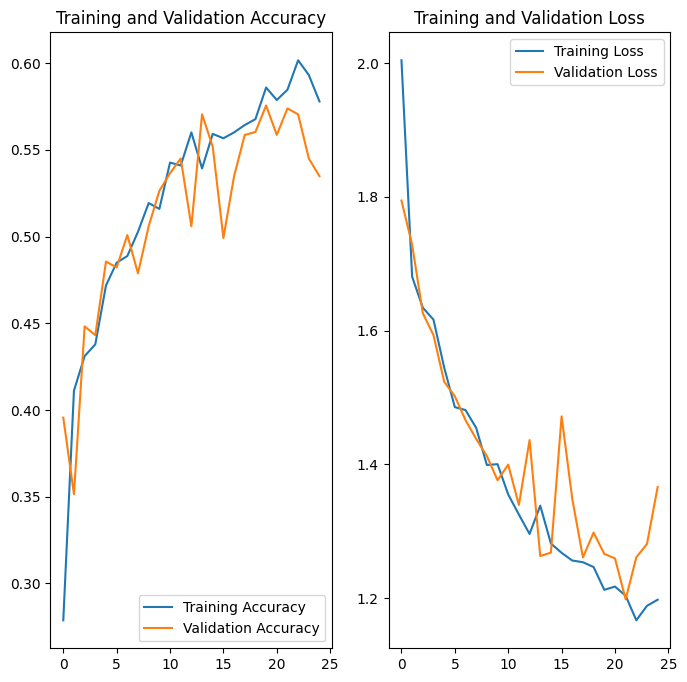

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Findings
- With data agumenatation and drop layer, the overfitting of the model is adressed to great extend. Earlier the train and validation accuracy difference was nearly 20%, with latest approach it's reduced to 2-3%.

- The accuracy of the model is compromised heavily and decreased by fair bit from previous venilla model.

- Considering above 2 points, there is still a scope of lot of improvement of the model.

**Analyzing the class imbalance of the data**

total training image count = 2239 

-------------------------------------
Class name =  actinic keratosis
count      =  114
proportion =  0.05091558731576597
-------------------------------------
Class name =  basal cell carcinoma
count      =  376
proportion =  0.16793211255024565
-------------------------------------
Class name =  dermatofibroma
count      =  95
proportion =  0.04242965609647164
-------------------------------------
Class name =  melanoma
count      =  438
proportion =  0.19562304600267977
-------------------------------------
Class name =  nevus
count      =  357
proportion =  0.15944618133095131
-------------------------------------
Class name =  pigmented benign keratosis
count      =  462
proportion =  0.20634211701652524
-------------------------------------
Class name =  seborrheic keratosis
count      =  77
proportion =  0.03439035283608754
-------------------------------------
Class name =  squamous cell carcinoma
count      =  181
proportion =  0.08083966056

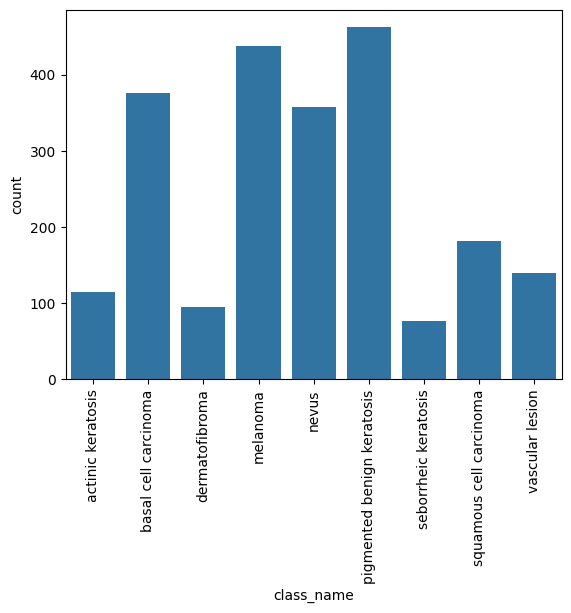

In [54]:
num_classes = len(class_names)
total = 0
all_count = []
class_name = []
for i in range(num_classes):
  count = len(list(data_dir_train.glob(class_names[i]+'/*.jpg')))
  total += count
print("total training image count = {} \n".format(total))
print("-------------------------------------")
for i in range(num_classes):
  count = len(list(data_dir_train.glob(class_names[i]+'/*.jpg')))
  print("Class name = ",class_names[i])
  print("count      = ",count)
  print("proportion = ",count/total)
  print("-------------------------------------")
  all_count.append(count)
  class_name.append(class_names[i])
  
temp_df = pd.DataFrame(list(zip(all_count, class_name)), columns = ['count', 'class_name'])
sns.barplot(data=temp_df, y="count", x="class_name")
plt.xticks(rotation=90)
plt.show()

**Findings**
Data is hevily imbalance and hence due to that results and predictions will be baised.

Augmentor : Class balance¶
Using Augmentor (https://augmentor.readthedocs.io/en/master/) to create the equal distribution of the class.

In [55]:
path_to_training_dataset = 'C:/Abhinav/Test/DL/skin_cancer/skin_cancer_images/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i, output_directory='C:/Abhinav/Test/DL/skin_cancer/skin_cancer_images/Train/'+i+'/output/')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(1000)

Initialised with 114 image(s) found.
Output directory set to C:/Abhinav/Test/DL/skin_cancer/skin_cancer_images/Train/actinic keratosis/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1FD74A2BB90>: 100%|██████████| 1000/1000 [00:06<00:00, 152.95 Samples/s]


Initialised with 376 image(s) found.
Output directory set to C:/Abhinav/Test/DL/skin_cancer/skin_cancer_images/Train/basal cell carcinoma/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1FD2F3054D0>: 100%|██████████| 1000/1000 [00:06<00:00, 165.21 Samples/s]


Initialised with 95 image(s) found.
Output directory set to C:/Abhinav/Test/DL/skin_cancer/skin_cancer_images/Train/dermatofibroma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FD255EBBD0>: 100%|██████████| 1000/1000 [00:06<00:00, 155.32 Samples/s]                 


Initialised with 438 image(s) found.
Output directory set to C:/Abhinav/Test/DL/skin_cancer/skin_cancer_images/Train/melanoma/output/.

Processing <PIL.Image.Image image mode=RGB size=833x680 at 0x1FD2561D910>: 100%|██████████| 1000/1000 [00:29<00:00, 34.34 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to C:/Abhinav/Test/DL/skin_cancer/skin_cancer_images/Train/nevus/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1FD23A1A710>: 100%|██████████| 1000/1000 [00:22<00:00, 44.91 Samples/s] 


Initialised with 462 image(s) found.
Output directory set to C:/Abhinav/Test/DL/skin_cancer/skin_cancer_images/Train/pigmented benign keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FD2563FB50>: 100%|██████████| 1000/1000 [00:06<00:00, 160.40 Samples/s]                 


Initialised with 77 image(s) found.
Output directory set to C:/Abhinav/Test/DL/skin_cancer/skin_cancer_images/Train/seborrheic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1FD1DD73ED0>: 100%|██████████| 1000/1000 [00:12<00:00, 77.31 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to C:/Abhinav/Test/DL/skin_cancer/skin_cancer_images/Train/squamous cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FD47C7C590>: 100%|██████████| 1000/1000 [00:06<00:00, 146.03 Samples/s]                 


Initialised with 139 image(s) found.
Output directory set to C:/Abhinav/Test/DL/skin_cancer/skin_cancer_images/Train/vascular lesion/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FD701E1C50>: 100%|██████████| 1000/1000 [00:06<00:00, 155.50 Samples/s]                 


In [56]:
output_dir = pathlib.Path('C:/Abhinav/Test/DL/skin_cancer/skin_cancer_images/Train/')
image_count_train = len(list(output_dir.glob('*/output/*.jpg')))
print(image_count_train)

9707


total training image count = 9707 

-------------------------------------
Class name =  actinic keratosis
count      =  1707
proportion =  0.17585247759348924
-------------------------------------
Class name =  basal cell carcinoma
count      =  1000
proportion =  0.10301844030081385
-------------------------------------
Class name =  dermatofibroma
count      =  1000
proportion =  0.10301844030081385
-------------------------------------
Class name =  melanoma
count      =  1000
proportion =  0.10301844030081385
-------------------------------------
Class name =  nevus
count      =  1000
proportion =  0.10301844030081385
-------------------------------------
Class name =  pigmented benign keratosis
count      =  1000
proportion =  0.10301844030081385
-------------------------------------
Class name =  seborrheic keratosis
count      =  1000
proportion =  0.10301844030081385
-------------------------------------
Class name =  squamous cell carcinoma
count      =  1000
proportion =  0.1

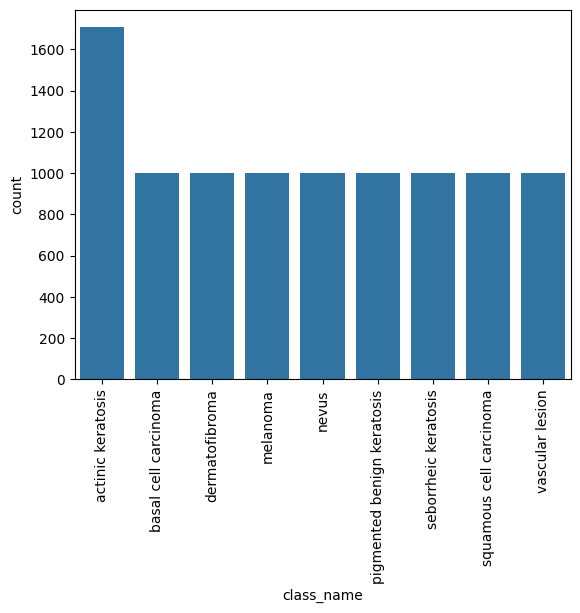

In [57]:
num_classes = len(class_names)
total = 0
all_count = []
class_name = []

for i in range(num_classes):
  count = len(list(output_dir.glob(class_names[i]+'/output/*.jpg')))
  total += count
print("total training image count = {} \n".format(total))
print("-------------------------------------")
for i in range(num_classes):
  count = len(list(output_dir.glob(class_names[i]+'/output/*.jpg')))
  print("Class name = ",class_names[i])
  print("count      = ",count)
  print("proportion = ",count/total)
  print("-------------------------------------")
  all_count.append(count)
  class_name.append(class_names[i])
  
temp_df = pd.DataFrame(list(zip(all_count, class_name)), columns = ['count', 'class_name'])
sns.barplot(data=temp_df, y="count", x="class_name")
plt.xticks(rotation=90)
plt.show()

**Model 3: Model with Class balance data**

In [58]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11946 files belonging to 9 classes.
Using 9557 files for training.


In [59]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11946 files belonging to 9 classes.
Using 2389 files for validation.


In [61]:
print(train_ds.class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [62]:
num_classes = 9
model = Sequential([layers.experimental.preprocessing.Rescaling(1.0/255,input_shape=(img_height,img_width,3))])

model.add(Conv2D(32, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.15))

model.add(Conv2D(256, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.20))

model.add(Conv2D(512, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(units=num_classes, activation= 'softmax'))

In [63]:
opt = Adam(lr=0.001)
model.compile(optimizer= opt, loss = SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [64]:
epochs = 35
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/35
299/299 [==============================] - 248s 803ms/step - loss: 2.1935 - accuracy: 0.1507 - val_loss: 2.1884 - val_accuracy: 0.1469
Epoch 2/35
299/299 [==============================] - 232s 775ms/step - loss: 2.1847 - accuracy: 0.1538 - val_loss: 2.1883 - val_accuracy: 0.1469
Epoch 3/35
299/299 [==============================] - 234s 780ms/step - loss: 2.1680 - accuracy: 0.1701 - val_loss: 2.1669 - val_accuracy: 0.1653
Epoch 4/35
299/299 [==============================] - 242s 808ms/step - loss: 1.9556 - accuracy: 0.2553 - val_loss: 1.9451 - val_accuracy: 0.2520
Epoch 5/35
299/299 [==============================] - 253s 844ms/step - loss: 1.6573 - accuracy: 0.3650 - val_loss: 1.4294 - val_accuracy: 0.4203
Epoch 6/35
299/299 [==============================] - 239s 796ms/step - loss: 1.3970 - accuracy: 0.4697 - val_loss: 1.3471 - val_accuracy: 0.4772
Epoch 7/35
299/299 [==============================] - 236s 787ms/step - loss: 1.1898 - accuracy: 0.5561 - val_loss: 1.1017 -

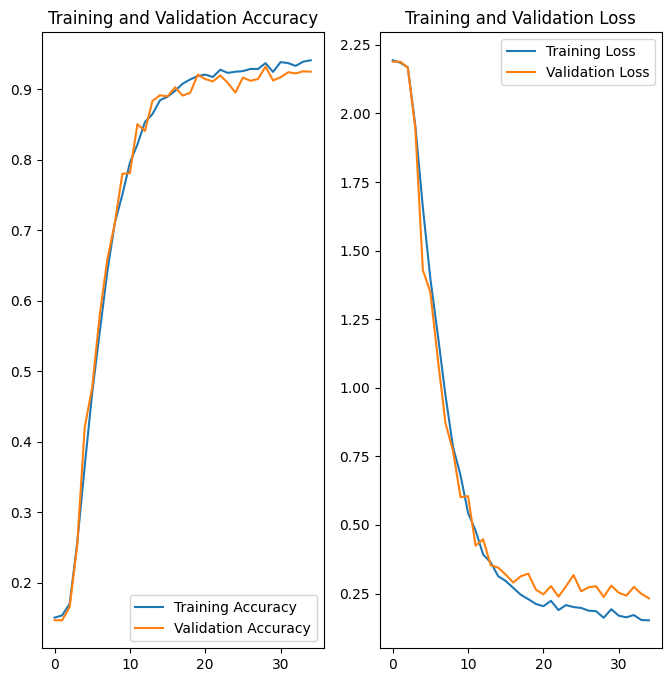

In [65]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Findings:
- After rebalance/resampling of the data (that gave equal proportion of data )and raised the accuray of the mdoel to 90%. This addressed the low accurty problem.

- overfitting probelm is adressed and now difference between train and val set is nearly 4-5% diff.

- with these results it's conclusive that current module with rebalanced data is the best module.

In [67]:
# Load the pre-trained VGG16 model
base_model = VGG16(input_shape=(img_height, img_width, 3),
                   include_top=False,
                   weights='imagenet')

# Freeze the layers of the VGG16 model
base_model.trainable = False

# Create the model architecture by adding additional layers on top of VGG16
model = Sequential([layers.experimental.preprocessing.Rescaling(1.0/255, input_shape=(img_height,img_width,3)),
                    base_model,
                    Flatten(),
                    Dense(1024, activation='relu'),
                    Dropout(0.5),
                    Dense(len(class_names), activation='softmax')])

# Compile the model
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 12800)             0         
                                                                 
 dense_11 (Dense)            (None, 1024)              13108224  
                                                                 
 dropout_7 (Dropout)         (None, 1024)              0         
                                                                 
 dense_12 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 27823937 (106.14 MB)
Trainable params: 1

In [ ]:
# Train the model
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

In [66]:
# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

58889256/58889256 [==============================] - 66s 1us/step


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 12800)             0         
                                                                 
 dense_9 (Dense)             (None, 1024)              13108224  
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_10 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 27823937 (106.14 MB)
Trainable params: 1

InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\abhin\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\abhin\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\abhin\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "C:\Users\abhin\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "c:\Users\abhin\AppData\Local\Programs\Python\Python311\Lib\asyncio\windows_events.py", line 321, in run_forever

  File "c:\Users\abhin\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever

  File "c:\Users\abhin\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "c:\Users\abhin\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\abhin\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "C:\Users\abhin\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "C:\Users\abhin\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "C:\Users\abhin\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "C:\Users\abhin\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "C:\Users\abhin\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\abhin\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell

  File "C:\Users\abhin\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell

  File "C:\Users\abhin\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\abhin\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async

  File "C:\Users\abhin\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes

  File "C:\Users\abhin\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code

  File "C:\Users\abhin\AppData\Local\Temp\ipykernel_24532\126116916.py", line 29, in <module>

  File "c:\Users\abhin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\abhin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "c:\Users\abhin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "c:\Users\abhin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "c:\Users\abhin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "c:\Users\abhin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1151, in train_step

  File "c:\Users\abhin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss

  File "c:\Users\abhin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "c:\Users\abhin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 143, in __call__

  File "c:\Users\abhin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 270, in call

  File "c:\Users\abhin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 2454, in sparse_categorical_crossentropy

  File "c:\Users\abhin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py", line 5775, in sparse_categorical_crossentropy

Received a label value of 8 which is outside the valid range of [0, 1).  Label values: 0 7 7 3 4 7 0 6 3 5 3 2 4 3 5 2 4 0 2 3 1 7 2 2 3 3 0 4 5 4 8 8
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_91771]